In [34]:
# Dependencies
import matplotlib.pyplot as plt
import requests
import scipy.stats as st
import pandas as pd
from config import api_key

In [35]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="

In [36]:
# Get latitude and temperature for cities
cities = ["Paris", "London", "Oslo", "Beijing", "Mumbai", "Manila", "New York", "Seattle", "Dallas", "Taipei"]

# set up lists to hold reponse info
lat = []
temp = []

# Loop through the list of cities and perform a request for data on each
for city in cities:
    response = requests.get(query_url + city).json()
    lat.append(response['coord']['lat'])
    temp.append(response['main']['temp'])

print(f"The latitude information received is: {lat}")
print(f"The temperature information received is: {temp}")

The latitude information received is: [48.8534, 51.5085, 59.9127, 39.9075, 19.0144, 14.6042, 40.7143, 47.6062, 32.7668, 25.0478]
The temperature information received is: [15.56, 13.24, 15.8, 25.69, 28.99, 29.51, 22.44, 27.55, 31.13, 29.82]


In [37]:
# create a data frame from cities, lat, and temp
weather_dict = {
    "city": cities,
    "lat": lat,
    "temp": temp
}
weather_data = pd.DataFrame(weather_dict)
weather_data

,city,lat,temp
0,Paris,48.8534,15.56
1,London,51.5085,13.24
2,Oslo,59.9127,15.80
3,Beijing,39.9075,25.69
4,Mumbai,19.0144,28.99
5,Manila,14.6042,29.51
6,New York,40.7143,22.44
7,Seattle,47.6062,27.55
8,Dallas,32.7668,31.13
9,Taipei,25.0478,29.82


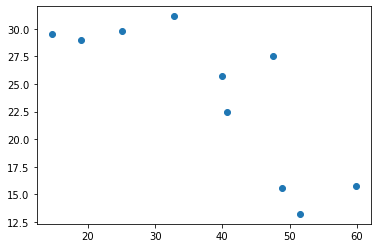

In [38]:
# Create a Scatter Plot for temperature vs. latitude
plt.scatter(lat,temp)

In [45]:
# Perform a linear regression on temperature vs. latitude
# Get regression values
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(lat, temp)

In [50]:
# Create line equation string
line_eq = 'y= ' + str(round(slope,2)) + 'x +' + str(round(intercept,2))
fit = slope * weather_data.lat + intercept

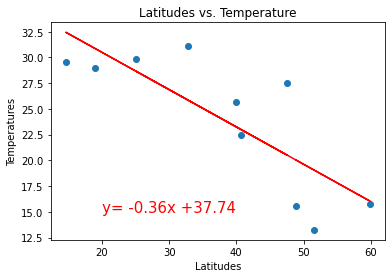

In [52]:
# Create Plot
plt.scatter(lat,temp)

# Label plot and annotate the line equation
plt.plot(weather_data.lat,fit,'r-')
plt.xlabel("Latitudes")
plt.ylabel("Temperatures")
plt.annotate(line_eq, (20,15), fontsize=15, color='red')
plt.title('Latitudes vs. Temperature')


# Print r square value


# Show plot
plt.show()

In [54]:
# Use the line equation to predict the temperature for Florence at a latitude of 43.77 degree
florence_lat = 43.77
florence_predicted_temp = round(slope * florence_lat + intercept, 2)

print(f'The predicted temperature using this forumla is: {florence_predicted_temp}.')


The predicted temperature using this forumla is: 21.88.


In [70]:
# Use API to determine actual temperature
florence_response = requests.get(f'{url}q=Florence&units={units}&appid={api_key}').json()

florence_weather = florence_response['main']['temp']
print(f'The actual temperature in Florence is: {florence_weather}')


The actual temperature in Florence is: 20.7
